In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Perspective Transform 데이터 불러오기

In [36]:
df = pd.read_csv('road_transform_output.csv')
df = df.sort_values(by=['id', 'frame'])
df

,id,frame,class,x,y,pos_x,pos_y
0,1,3,car,404.0,244.000000,49.579870,111.372480
1,1,4,car,401.0,246.000000,49.162570,115.995860
2,1,5,car,398.0,248.000000,48.753517,120.527885
3,1,6,car,395.0,251.000000,48.980720,126.757630
4,1,7,car,393.0,254.000000,49.743687,132.540800
...,...,...,...,...,...,...,...
96327,7065,53989,truck,201.6,325.000000,4.433906,260.719880
96328,7065,53990,truck,196.4,328.333333,4.386452,264.994140
96329,7065,53991,truck,191.2,331.666667,4.338999,269.268370
96330,7065,53992,truck,186.0,335.000000,4.291545,273.542630


### 실제 속도로 변환

- **상수 설정**
    - `FPS`: 영상의 프레임 수, 이를 통해 단위 프레임을 단위 시간으로 변환할 수 있다.
    - `DELTA_FRAME`: 몇 프레임을 변화량으로 볼 것인지에 대한 상수이다.
    - `LENGTH_PIXEL`: 구간의 픽셀 단위의 길이
    - `LENGTH_METER`: 구간의 미터 단위의 길이

In [37]:
FPS = 30
DELTA_FRAME = 5
LENGTH_METER = 50
LENGTH_PIXEL = 300

In [38]:
DELTA_TIME = DELTA_FRAME / FPS
PIXEL_PER_METER = LENGTH_METER / LENGTH_PIXEL

speed = []

for id in df['id'].unique():
    temp_df = df[df['id'] == id]
    speed.extend(list(temp_df['pos_y'].diff(periods=DELTA_FRAME).values))

speed = np.array(speed) * PIXEL_PER_METER / DELTA_TIME # m/s
speed = speed * 3.6 # km/h

print(len(speed), speed)

96332 [      nan       nan       nan ... 76.936464 76.936536 73.107756]


In [39]:
df['speed(km/h)'] = speed
df

,id,frame,class,x,y,pos_x,pos_y,speed(km/h)
0,1,3,car,404.0,244.000000,49.579870,111.372480,NaN
1,1,4,car,401.0,246.000000,49.162570,115.995860,NaN
2,1,5,car,398.0,248.000000,48.753517,120.527885,NaN
3,1,6,car,395.0,251.000000,48.980720,126.757630,NaN
4,1,7,car,393.0,254.000000,49.743687,132.540800,NaN
...,...,...,...,...,...,...,...,...
96327,7065,53989,truck,201.6,325.000000,4.433906,260.719880,76.936536
96328,7065,53990,truck,196.4,328.333333,4.386452,264.994140,76.936536
96329,7065,53991,truck,191.2,331.666667,4.338999,269.268370,76.936464
96330,7065,53992,truck,186.0,335.000000,4.291545,273.542630,76.936536


In [40]:
df.to_csv('road_transform_speed.csv', index=False)

### 히스토그램 그리기

In [41]:
TITLE = ''
MIN_SPEED = 25
MAX_SPEED = 200

In [42]:
# remove nan value in speed using numpy
speed = df['speed(km/h)'].to_numpy()
speed = speed[~np.isnan(speed)]
print(len(speed), speed)

89325 [ 97.366932  95.432112 100.208754 ...  76.936464  76.936536  73.107756]


In [43]:
# remove outlier
tailored_speed = speed[np.logical_and(speed >= MIN_SPEED, speed <= MAX_SPEED)]
print(len(tailored_speed), tailored_speed)

77851 [ 97.366932  95.432112 100.208754 ...  76.936464  76.936536  73.107756]


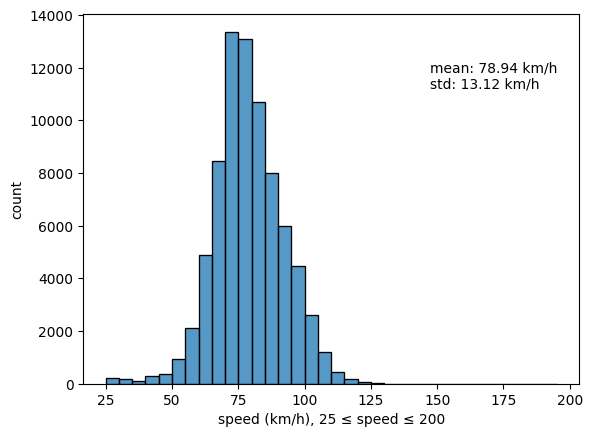

In [44]:
# set title
plt.title(TITLE)

# draw speed distribution
ax = sns.histplot(data=tailored_speed, binwidth=5)
ax.set(xlabel=f'speed (km/h), {MIN_SPEED} ≤ speed ≤ {MAX_SPEED}', ylabel='count')

# draw speed mean and std text in the plot
mean = np.mean(tailored_speed)
std = np.std(tailored_speed)
ax.text(0.7, 0.8, f'mean: {mean:.2f} km/h\nstd: {std:.2f} km/h', transform=ax.transAxes)

plt.savefig('road_transform_speed_distribution.png')
plt.show()